## Time Series

---

In [1]:
import os
import sys

# Import the regular expression module
import re

import numpy as np

import pandas as pd
from scipy.stats import zscore

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Prior size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Prior size: [6.0, 4.0]
Current size: [12, 9]


In [3]:
# -- -----------------------------------------------------------------
PROJ_ROOT = '../..'

print("------------------------------")
print("          PROJ_ROOT           ")
print(os.path.abspath(PROJ_ROOT))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(PROJ_ROOT, 'src')
sys.path.append(src_dir)


print("------------------------------")
print("           src_dir            ")
print(os.path.abspath(src_dir))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# import my method from the source code
%aimport helper_functions
import helper_functions as hf
# -- -----------------------------------------------------------------

------------------------------
          PROJ_ROOT           
/home/intsights/repos/repos-edu/repos-ds-math-python/data-hero
------------------------------
 
------------------------------
           src_dir            
/home/intsights/repos/repos-edu/repos-ds-math-python/data-hero/src
------------------------------
 



---

### Import Data

In [4]:
stocks = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'stocks.csv',
    p_index_col    = 'Date',
    p_parse_dates  = True
)


stocks.head()

,AAPL,IBM,CSCO,MSFT
Date,,,,
2000-01-03,111.937502,116.0000,108.0625,116.5625
2000-01-04,102.500003,112.0625,102.0000,112.6250
2000-01-05,103.999997,116.0000,101.6875,113.8125
2000-01-06,94.999998,114.0000,100.0000,110.0000
2000-01-07,99.500001,113.5000,105.8750,111.4375


In [5]:
aapl = stocks['AAPL']
ibm  = stocks['IBM']
csco = stocks['CSCO']
msft = stocks['MSFT']

In [6]:
aapl.head()

Date
2000-01-03    111.937502
2000-01-04    102.500003
2000-01-05    103.999997
2000-01-06     94.999998
2000-01-07     99.500001
Name: AAPL, dtype: float64

---
### Multiple time series on common axes

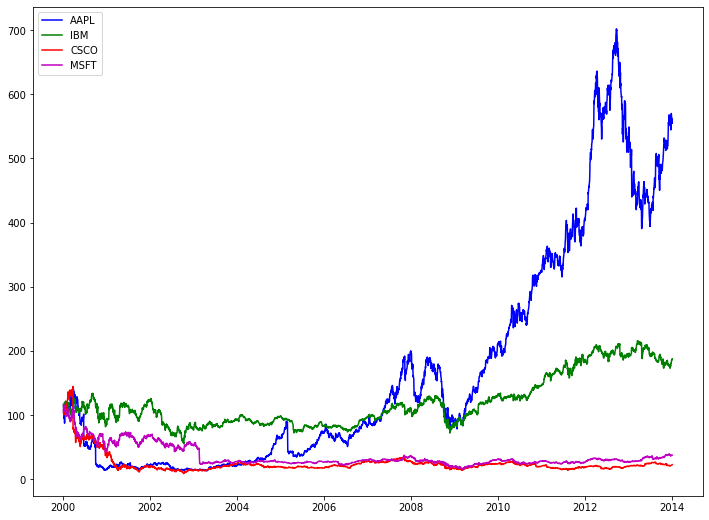

In [7]:
plt.plot(aapl, color='b', label='AAPL')
plt.plot(ibm,  color='g', label='IBM')
plt.plot(csco, color='r', label='CSCO')
plt.plot(msft, color='m', label='MSFT')


# Add a legend in the top left corner of the plot
plt.legend(loc='upper left')

---
### Multiple time series slices (1)
- Plotting time series at different intervals can provide you with deeper insight into your data. 
- Here, for example, you can see that the AAPL stock price rose and fell a great amount between 2007 and 2008.

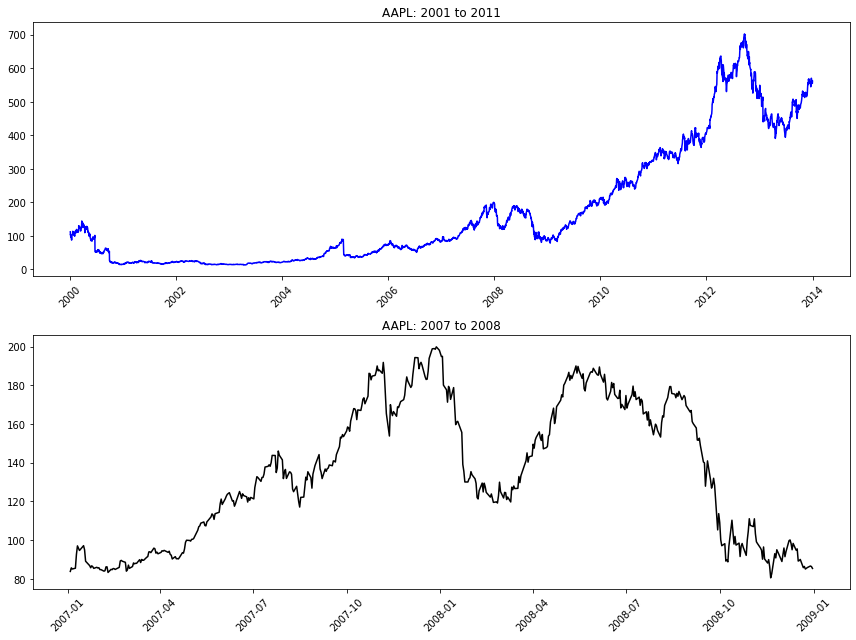

In [8]:
# -- --------------------------------------------------
# Plot the series in the top subplot in blue
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('AAPL: 2001 to 2011')
plt.plot(aapl, color='blue')
# -- --------------------------------------------------


# -- --------------------------------------------------
# Slice aapl from '2007' to '2008' inclusive: view
view = aapl['2007':'2008']

# Plot the sliced data in the bottom subplot in black
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: 2007 to 2008')
plt.plot(view, color='black')
# -- --------------------------------------------------


plt.tight_layout()
plt.show()

---
### Multiple time series slices (2)

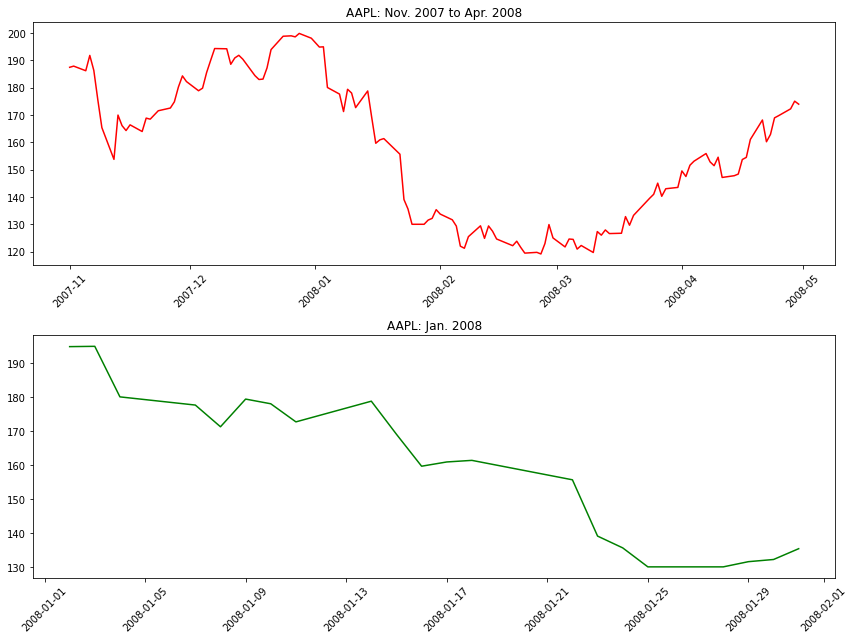

In [9]:
# -- --------------------------------------------------
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['2007-11':'2008-04']

# Plot the sliced series in the top subplot in red
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('AAPL: Nov. 2007 to Apr. 2008')
plt.plot(view, color='red')
# -- --------------------------------------------------


# -- --------------------------------------------------
# Reassign the series by slicing the month January 2008
view = aapl['2008-01']

# Plot the sliced series in the bottom subplot in green
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: Jan. 2008')
plt.plot(view, color='green')
# -- --------------------------------------------------



# Improve spacing and display the plot
plt.tight_layout()
plt.show()

---
### Plotting an inset view

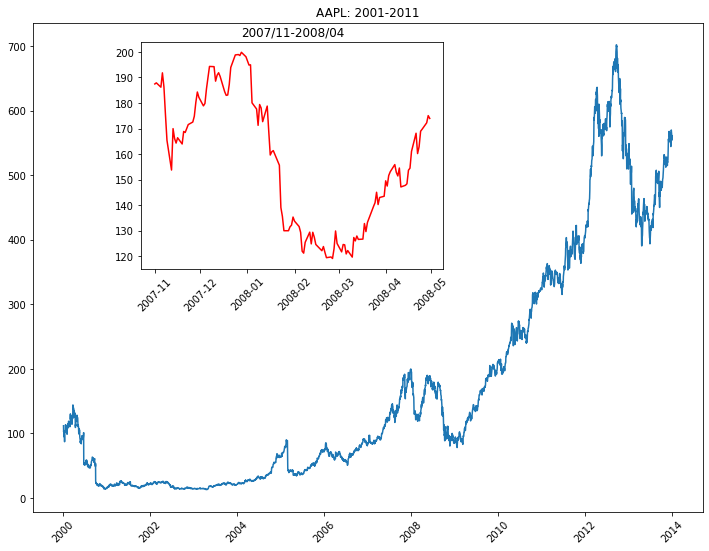

In [10]:
# -- --------------------------------------------------
# Plot the entire series 
plt.plot(aapl)
plt.xticks(rotation=45)
plt.title('AAPL: 2001-2011')
# -- --------------------------------------------------



# -- --------------------------------------------------
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['2007-11':'2008-04']

# Specify the axes
plt.axes([0.25, 0.5, 0.35, 0.35])

# Plot the sliced series in red using the current axes
plt.plot(view, color='red')
plt.xticks(rotation=45)
plt.title('2007/11-2008/04')
# -- --------------------------------------------------


plt.show()

---
### Plotting moving averages

In [11]:
# Create rolling averages of 30 days, 75 days, 125 days, and 250 days
mean_30  = aapl.rolling(window=30).mean()
mean_75  = aapl.rolling(window=75).mean()
mean_125 = aapl.rolling(window=125).mean()
mean_250 = aapl.rolling(window=250).mean()

In [12]:
type(mean_30)

pandas.core.series.Series

In [13]:
mean_30.tail()

Date
2013-12-24    545.345327
2013-12-26    546.808328
2013-12-27    548.123661
2013-12-30    549.002326
2013-12-31    550.203325
Name: AAPL, dtype: float64

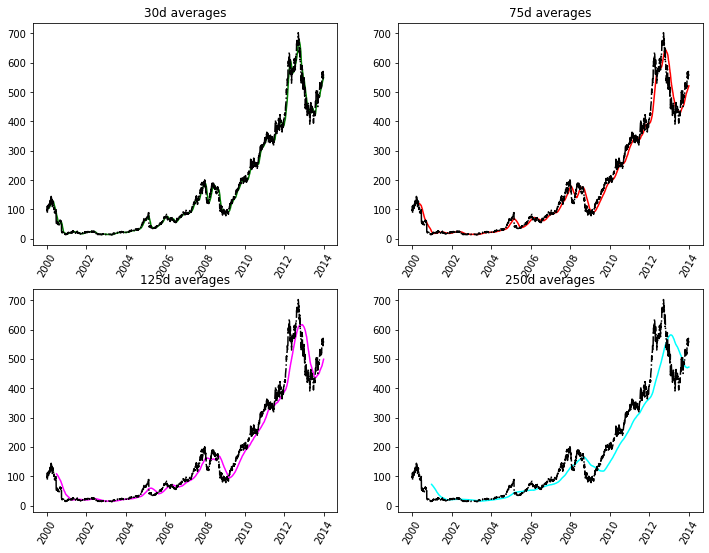

In [14]:
# Plot the 30-day moving average in the top left subplot in green
plt.subplot(2, 2, 1)
plt.plot(mean_30, 'green')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('30d averages')

# Plot the 75-day moving average in the top right subplot in red
plt.subplot(2, 2, 2)
plt.plot(mean_75, 'red')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('75d averages')

# Plot the 125-day moving average in the bottom left subplot in magenta
plt.subplot(2, 2, 3)
plt.plot(mean_125, 'magenta')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('125d averages')

# Plot the 250-day moving average in the bottom right subplot in cyan
plt.subplot(2, 2, 4)
plt.plot(mean_250, 'cyan')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('250d averages')

# Display the plot
plt.show()

---
### Plotting moving standard deviations

In [15]:
# Create rolling std of 30 days, 75 days, 125 days, and 250 days
std_30  = aapl.rolling(window=30).std()
std_75  = aapl.rolling(window=75).std()
std_125 = aapl.rolling(window=125).std()
std_250 = aapl.rolling(window=250).std()

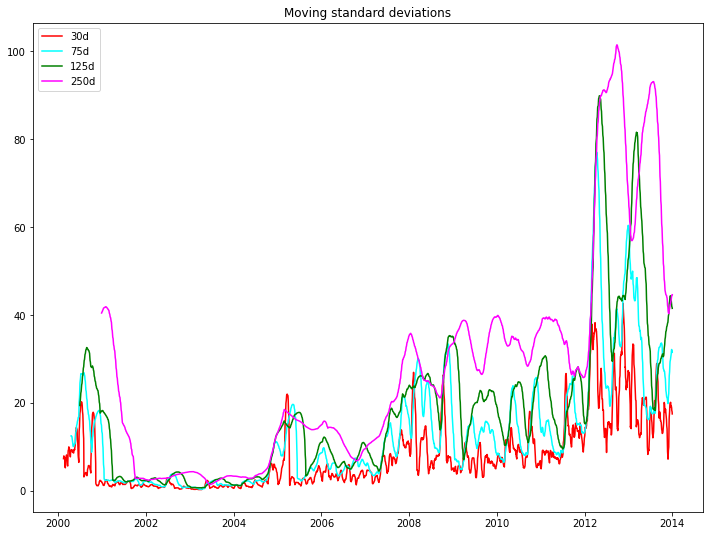

In [16]:
plt.plot(std_30,  'red',     label = '30d')
plt.plot(std_75,  'cyan',    label = '75d')
plt.plot(std_125, 'green',   label = '125d')
plt.plot(std_250, 'magenta', label = '250d')


plt.legend(loc='upper left')
plt.title('Moving standard deviations')
plt.show()